<a href="https://colab.research.google.com/github/Willgnner-Santos/legal-LLM-input-representation-PTBR/blob/main/ML/Logistic-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn matplotlib seaborn tqdm

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



==== Avaliação no Teste ====
Acurácia: 0.9306
Precisão (macro): 0.8663
Recall (macro): 0.7548
F1-score (macro): 0.7897
MCC: 0.9243

Relatório completo:

              precision    recall  f1-score   support

           1       0.94      0.95      0.95        88
           2       1.00      0.50      0.67         2
           3       0.97      1.00      0.98        59
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.97      0.98        30
           7       1.00      0.80      0.89         5
           8       1.00      0.90      0.95        61
           9       0.94      0.94      0.94        17
          10       0.88      1.00      0.94       100
          11       1.00      0.50      0.67         6
          12       0.88      0.95      0.92        85
          13       1.00      0.97      0.98        29
          14       0.93      0.82      0.88        34
          15       1.00      0.80  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


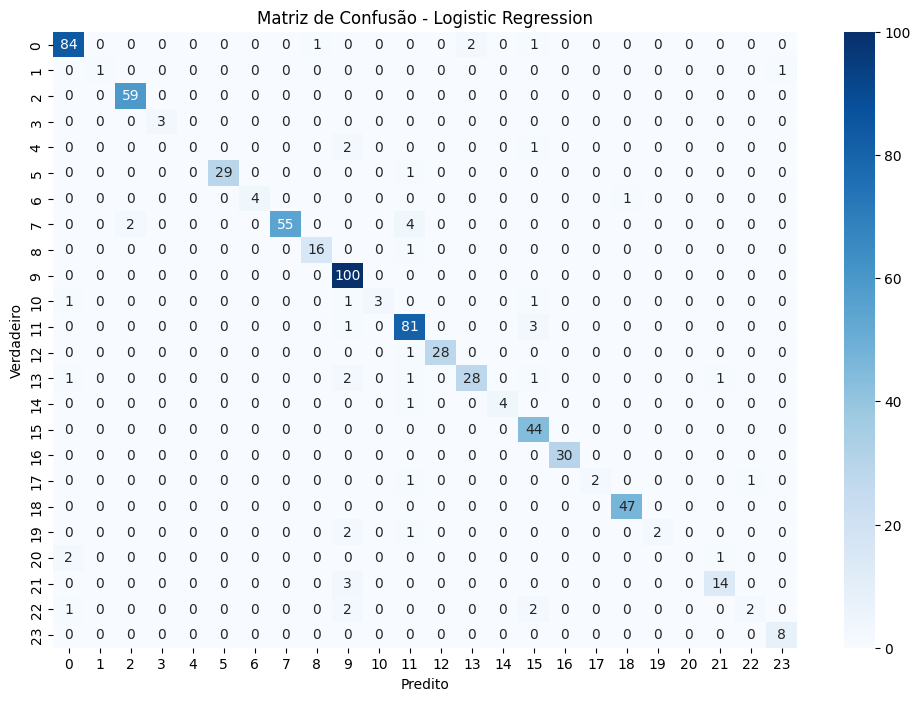

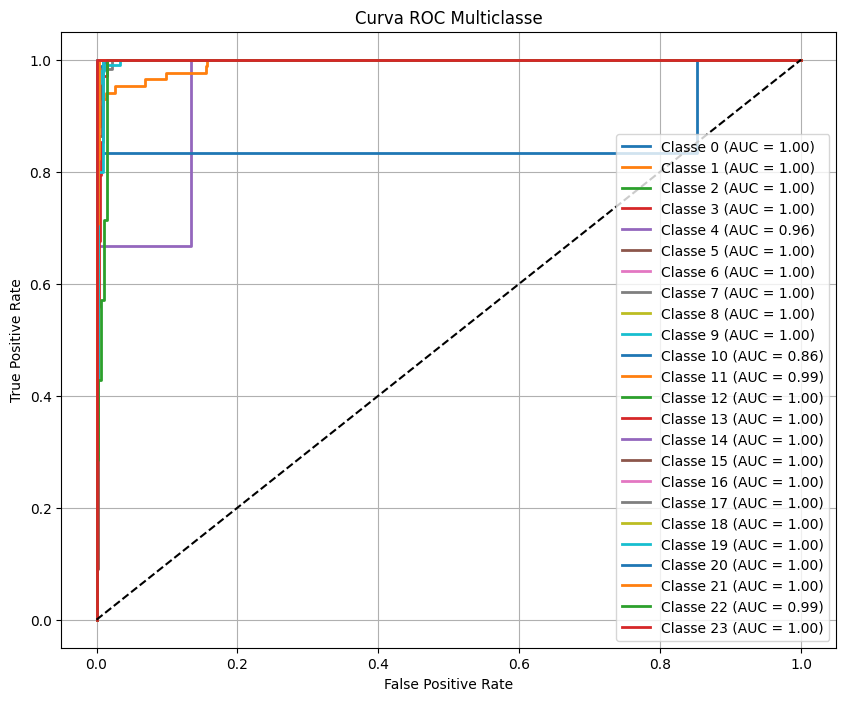

AUC-ROC Média Macro: 0.9912


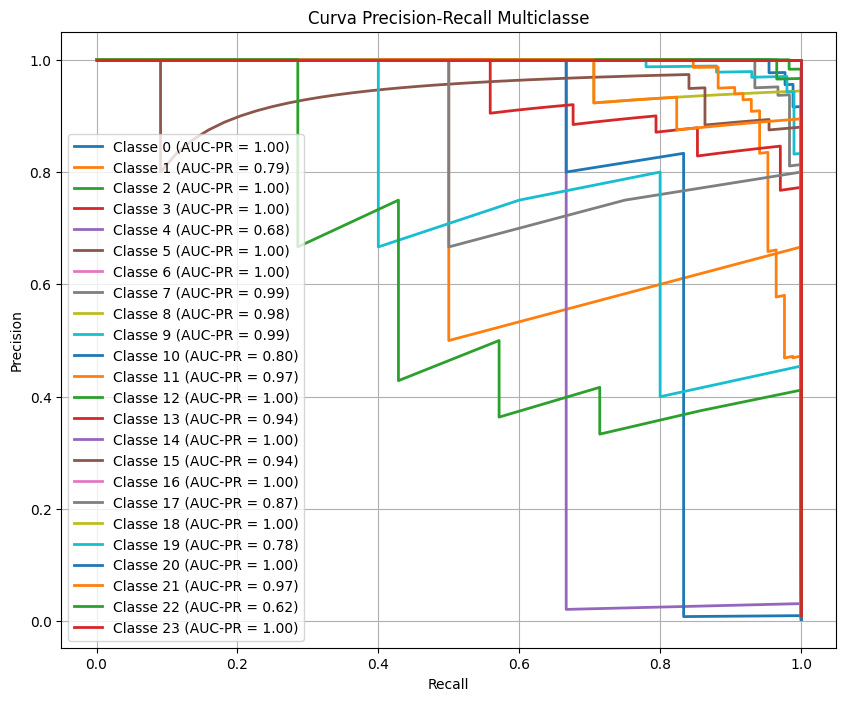

AUC-PR Média Macro: 0.9304


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


==== Validação Cruzada ====
accuracy: 0.9280 ± 0.0049
precision_macro: 0.8812 ± 0.0150
recall_macro: 0.7651 ± 0.0222
f1_macro: 0.7988 ± 0.0217


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             matthews_corrcoef, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, auc, precision_recall_curve)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# Carregar dados
# ========================
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Defesa final/ML/Logistic Regression/Dados/dataset-petitions-legal-br.csv')

X = df['facts']
le = LabelEncoder()
y = le.fit_transform(df['issue_area_label'])
classes = le.classes_

# ========================
# Vetorização
# ========================
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_vectorized = vectorizer.fit_transform(X)

# ========================
# Split
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42, stratify=y
)

# ========================
# Modelo Logistic Regression
# ========================
# Modelagem
lr = LogisticRegression(
    solver='saga', max_iter=1000, random_state=42
)

lr.fit(X_train, y_train)

# Previsões
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)

# Labels
target_names = [str(c) for c in le.classes_]

# Métricas
print("\n==== Avaliação no Teste ====")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}")

print("\nRelatório completo:\n")
print(classification_report(
    y_test, y_pred, target_names=target_names, zero_division=0
))

# ========================
# Matriz de Confusão
# ========================
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Logistic Regression')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# ========================
# AUC-ROC e AUC-PR
# ========================
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# ROC Curve
fpr, tpr, roc_auc = dict(), dict(), dict()

plt.figure(figsize=(10,8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC Multiclasse')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"AUC-ROC Média Macro: {np.mean(list(roc_auc.values())):.4f}")

# Precision-Recall
precision, recall, pr_auc = dict(), dict(), dict()

plt.figure(figsize=(10,8))
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label=f'Classe {i} (AUC-PR = {pr_auc[i]:.2f})')

plt.title('Curva Precision-Recall Multiclasse')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()

print(f"AUC-PR Média Macro: {np.mean(list(pr_auc.values())):.4f}")

# ========================
# Validação Cruzada
# ========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv_results = cross_validate(
    lr, X_vectorized, y, cv=cv, scoring=scoring, return_train_score=False
)

print("\n==== Validação Cruzada ====")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric}: {scores.mean():.4f} ± {scores.std():.4f}")